In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
from img_utils import *

2024-04-02 12:02:46.035086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 12:02:46.035151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 12:02:46.097033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-02 12:02:46.224663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 12:02:48.108939: W tensorflow/compiler/tf2

# Loading Data 

In [3]:
import pandas as pd
path = "../nybolig-scrape/output/part_1"
# path = "../nybolig-scrape/output/part_2"
# path = "../nybolig-scrape/output/stylized_part_1"
houses_df: pd.DataFrame = data_to_DF(path)
print("Number of datapoints of type 'Ejerlejlighed': ", len(houses_df))  # TODO: Try including houses that dont have energy label and other missing data
display(houses_df)

Number of datapoints of type 'Ejerlejlighed':  900


,address,postal_code,type,price,size,basement_size,rooms,year_built,year_rebuilt,energy_label,postal_avg_sqm_price,image_floorplan
0,Acaciavej 1 1. 1867 Frederiksberg C,1867,ejerlejlighed,9995000,124,None,4.0,1875.0,2022.0,B,61761.50,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Agerskovvej 4D 2. 2610 Rødovre,2610,ejerlejlighed,1945000,70,None,2.0,1968.0,NaN,D,33273.25,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Agerskovvej 4M st. 2610 Rødovre,2610,ejerlejlighed,2195000,70,None,2.0,1968.0,NaN,D,33273.25,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Aggersborggade 9 1. tv 2100 København Ø,2100,ejerlejlighed,5650000,80,None,3.0,1896.0,1933.0,D,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Aggersvoldvej 3B 3. 2700 Brønshøj,2700,ejerlejlighed,2725000,66,None,3.0,1934.0,NaN,C,33507.50,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Østerbrogade 212 2. tv 2100 København Ø,2100,ejerlejlighed,2495000,86,None,3.0,1938.0,NaN,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
896,Østerbrogade 224 1. th 2100 København Ø,2100,ejerlejlighed,3645000,70,None,2.0,1938.0,NaN,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
897,Østerbrogade 224 4. th. 2100 København Ø,2100,ejerlejlighed,4295000,70,None,3.0,1938.0,NaN,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
898,Østervej 13A st. tv 2600 Glostrup,2600,ejerlejlighed,1795000,57,None,2.0,1938.0,1998.0,D,28042.50,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


# Setting up splits

In [4]:
from sklearn.model_selection import train_test_split

# Remove outliers
houses_df = remove_outliers(houses_df, "price", z_score_threshold=2)
print("Number of datapoints of type 'Ejerlejlighed' after removing outliers: ", len(houses_df))

# Preprocess the data
# Drop "basement_size" and "year_rebuilt" columns
houses_df = houses_df.drop(columns=["basement_size", "year_rebuilt"])

# Drop entries with missing values
houses_df = houses_df.dropna()

# Turn "postal_code", "price", "size" columns to float
houses_df["postal_code"] = houses_df["postal_code"].astype(float)
houses_df["price"] = houses_df["price"].astype(float)
houses_df["size"] = houses_df["size"].astype(float)

print(f"Number of datapoints of type 'Ejerlejlighed' after removing missing values: {len(houses_df)}")

display(houses_df)

# Split the data into train, validation and test sets with a 60-20-20 ratio
train_df, test_df = train_test_split(houses_df, test_size=0.2, random_state=0)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=0)

Number of datapoints of type 'Ejerlejlighed' after removing outliers:  859
Number of datapoints of type 'Ejerlejlighed' after removing missing values: 834


,address,postal_code,type,price,size,rooms,year_built,energy_label,postal_avg_sqm_price,image_floorplan
1,Agerskovvej 4D 2. 2610 Rødovre,2610.0,ejerlejlighed,1945000.0,70.0,2.0,1968.0,D,33273.25,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Agerskovvej 4M st. 2610 Rødovre,2610.0,ejerlejlighed,2195000.0,70.0,2.0,1968.0,D,33273.25,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Aggersborggade 9 1. tv 2100 København Ø,2100.0,ejerlejlighed,5650000.0,80.0,3.0,1896.0,D,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Aggersvoldvej 3B 3. 2700 Brønshøj,2700.0,ejerlejlighed,2725000.0,66.0,3.0,1934.0,C,33507.50,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,Ahornsgade 9 4. th 2200 København N,2200.0,ejerlejlighed,3195000.0,51.0,2.0,1886.0,D,51502.50,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...
894,Østerbrogade 206 4. tv. 2100 København Ø,2100.0,ejerlejlighed,4295000.0,77.0,3.0,1938.0,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
895,Østerbrogade 212 2. tv 2100 København Ø,2100.0,ejerlejlighed,2495000.0,86.0,3.0,1938.0,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
896,Østerbrogade 224 1. th 2100 København Ø,2100.0,ejerlejlighed,3645000.0,70.0,2.0,1938.0,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
897,Østerbrogade 224 4. th. 2100 København Ø,2100.0,ejerlejlighed,4295000.0,70.0,3.0,1938.0,C,55737.75,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [5]:
def scale_by_size(canvas_size, house_sizes, images, max_house_size):
  """
  Create a canvaz, and fit the images corresponding to the house size on the canvas and max_house_size
  """
  canvases = []
  for house_size, image in zip(house_sizes, images):
    #Create a canvas
    canvas = np.ones((canvas_size, canvas_size, 3), dtype=np.uint8)
    #Scale the image
    scale = (house_size/max_house_size)
    new_width = int(image.shape[1] * scale)
    new_height = int(image.shape[0] * scale)
    #Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    #Place the image in the center of the canvas
    x_offset = int((canvas_size - new_width) / 2)
    y_offset = int((canvas_size - new_height) / 2)
    canvas[y_offset:y_offset+resized_image.shape[0], x_offset:x_offset+resized_image.shape[1]] = resized_image
    # turn the canvas background to white
    canvas[canvas == 1] = 255
    canvases.append(canvas)
  # Return the canvases as a numpy array
  return np.array(canvases)

Datapoints after preprocessing:
Train: 533
Validation: 134
Test: 167
Total: 834
address                 Spaden A 5 1. 1. Høje Taastrup 2630 Taastrup
postal_code                                                   2630.0
type                                                   ejerlejlighed
size                                                            57.0
rooms                                                            2.0
year_built                                                    1973.0
energy_label                                                       C
postal_avg_sqm_price                                        24643.75
Name: 703, dtype: object


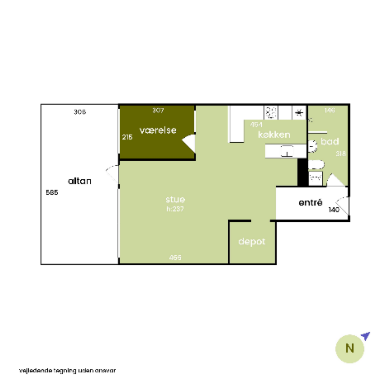

address                 Brofogedvej 14A st.. tv. 2400 København NV
postal_code                                                 2400.0
type                                                 ejerlejlighed
size                                                          64.0
rooms                                                          3.0
year_built                                                  1896.0
energy_label                                                     D
postal_avg_sqm_price                                      40391.75
Name: 97, dtype: object


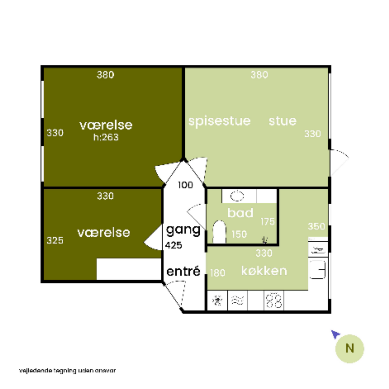

address                 Glasvej 31 4. tv 2400 København NV
postal_code                                         2400.0
type                                         ejerlejlighed
size                                                  80.0
rooms                                                  3.0
year_built                                          1989.0
energy_label                                         A2010
postal_avg_sqm_price                              40391.75
Name: 276, dtype: object


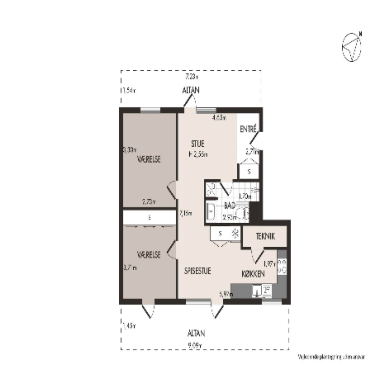

address                 Frederiksdalsvej 10G 2. tv. 2830 Virum
postal_code                                             2830.0
type                                             ejerlejlighed
size                                                      81.0
rooms                                                      4.0
year_built                                              1940.0
energy_label                                                 D
postal_avg_sqm_price                                  33907.25
Name: 239, dtype: object


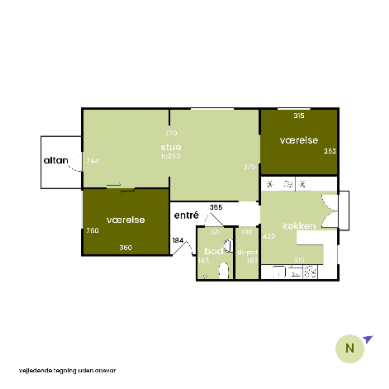

address                 Caprivej 7 1. tv 2300 København S
postal_code                                        2300.0
type                                        ejerlejlighed
size                                                 56.0
rooms                                                 2.0
year_built                                         1932.0
energy_label                                            C
postal_avg_sqm_price                             44946.75
Name: 137, dtype: object


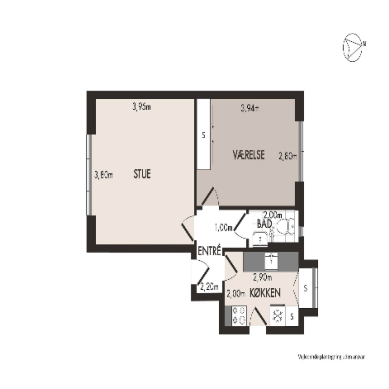

In [6]:
target_width = 448
target_height = 448

resize: bool = True
gray_scale: bool = False
threshhold: bool = False

train_images_RGB = preprocess_images(train_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)
validation_images_RGB = preprocess_images(valid_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)
test_images_RGB = preprocess_images(test_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)

train_features = train_df.drop(columns=["price", "image_floorplan"])
validation_features = valid_df.drop(columns=["price", "image_floorplan"])
test_features = test_df.drop(columns=["price", "image_floorplan"])

# Display some features along with their corresponding images
for i in range(5):
    print(train_features.iloc[i])
    plt.imshow(train_images_RGB[i])
    plt.axis('off')
    plt.show()

max_house_size = max(train_df['size'].max(), valid_df['size'].max(), test_df['size'].max())

train_prices = train_df['price']
validation_prices = valid_df['price']
test_prices = test_df['price']

# Model Fitting

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
    Concatenate,
    Input,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from multiprocessing import Process, Queue


def train_model(fine_tune_layers: int = 0):
    """
    Train a model with the VGG16 architecture and save the model to disk.

    Args:
        fine_tune_layers (int): Number of layers to fine-tune, counting from the top of the model.
    """
    set_gpu()

    # Load pre-trained VGG16 model (excluding top layers)
    input_shape = train_images_RGB[0].shape
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in (
        base_model.layers[:-fine_tune_layers]
        if fine_tune_layers > 0
        else base_model.layers
    ):
        layer.trainable = False

    # TODO: This will not work with the sequential model, needs to be done with the functional API

    # # Add new top layers for regression
    # vision_model = Sequential([
    #     base_model,
    #     Flatten(),
    #     Dense(512, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(256, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(1)
    # ])
    # vision_model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_absolute_error')

    # # Add a features model that extracts the features from the images
    # features_model = Sequential([
    #     Dense(64, activation='relu', input_shape=(train_features.shape[1],)),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(32, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(16, activation='relu')
    # ])
    # features_model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_absolute_error')

    # # Concatenate the features with the output of the vision model
    # model = Sequential([
    #     Concatenate([vision_model.output, features_model.output]),
    #     Dense(64, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(32, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.5),
    #     Dense(16, activation='relu'),
    #     Dense(1)
    # ])
    # # Build the model
    # model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_absolute_error')

    vision_model_input = Input(shape=input_shape)
    vision_model = base_model(vision_model_input)
    vision_model = Flatten()(vision_model)
    vision_model = Dense(512, activation="relu")(vision_model)
    vision_model = BatchNormalization()(vision_model)
    vision_model = Dropout(0.5)(vision_model)
    vision_model = Dense(256, activation="relu")(vision_model)
    vision_model = BatchNormalization()(vision_model)
    vision_model = Dropout(0.5)(vision_model)
    vision_model = Dense(1)(vision_model)

    features_model_input = Input(shape=(train_features.shape[1],))
    features_model = Dense(64, activation="relu")(features_model_input)
    features_model = BatchNormalization()(features_model)
    features_model = Dropout(0.5)(features_model)
    features_model = Dense(32, activation="relu")(features_model)
    features_model = BatchNormalization()(features_model)
    features_model = Dropout(0.5)(features_model)
    features_model = Dense(16, activation="relu")(features_model)

    concatenated = Concatenate()([vision_model, features_model])
    output_layer = Dense(64, activation="relu")(concatenated)

    model = Model(
        inputs=[vision_model_input, features_model_input], outputs=output_layer
    )
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="mean_absolute_error")

    # Train the model with early stopping
    early_stopping = EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
    history = model.fit(
        [train_images_RGB, train_features], train_prices, validation_data=([validation_images_RGB, validation_features], validation_prices), epochs=1000, batch_size=32, callbacks=[early_stopping]
    )

    model.save("./VGG16_concat_regression_model")

    # Plot the training history
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Training History")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.show()


p = Process(target=train_model, args=(0,))
p.start()
p.join()

2024-04-02 12:17:20.767564: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


1 Physical GPUs, 1 Logical GPU


2024-04-02 12:17:21.007462: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:17:21.007553: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:17:21.012267: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:17:21.012405: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:17:21.012453: I external/local_xla/xla/stream_executor

: 

In [12]:
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1)
# ])
# # scaled_to_size = False
# # resize, gray_scale, threshhold = True, False, True
# # learning_rate = 1
# # epochs = 100
# # patience = 30
# # results:
# # R2 score: 0.35
# # Mean Absolute Error: 1111833.93
# # Mean Squared Error: 2164829315237.49
# #
# # scaled_to_size = True
# # resize, gray_scale, threshhold = True, False, True
# # learning_rate = 1
# # epochs = 100
# # patience = 30
# # results:
# # R2 score: 0.45
# # Mean Absolute Error: 1044472.14  # Does not perform well in ensemble
# # Mean Squared Error: 1824225972428.69
# #
# # scaled_to_size = False
# # resize, gray_scale, threshhold = True, False, False
# # learning_rate = 1
# # epochs = 100
# # patience = 30
# # results:
# # R2 score: 0.44
# # Mean Absolute Error: 1055607.22
# # Mean Squared Error: 1816447247570.52
# #
# # stylized = True
# # scaled_to_size = False
# # resize, gray_scale, threshhold = True, False, False
# # learning_rate = 1
# # epochs = 100
# # patience = 30
# # results:
# # R2 score: 0.40
# # Mean Absolute Error: 1024576.98
# # Mean Squared Error: 1897059053568.04

# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1)
# ])
# # learning_rate = 1
# # epochs = 100
# # patience = 10
# # results:
# # R2 score: -0.81
# # Mean Absolute Error: 1779379.38
# # Mean Squared Error: 6009758915140.81
# #
# # learning_rate = 1
# # epochs = 100
# # patience = 30
# # results:
# # R2 score: 0.32
# # Mean Absolute Error: 1155295.97
# # Mean Squared Error: 2252672991998.55

# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1)
# ])
# learning_rate = 1
# epochs = 100
# patience = 30
# results:
# R2 score: 0.32
# Mean Absolute Error: 1148088.31
# Mean Squared Error: 2265939360684.82

# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(1024, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1)
# ])
# learning_rate = 1
# epochs = 100
# patience = 10
# results:
# R2 score: 0.34
# Mean Absolute Error: 1127382.80
# Mean Squared Error: 2200280689245.28

# Model Evaluation

In [13]:
def evaluate_model(queue: Queue):
    set_gpu()
    
    # Evaluate the model
    loaded_model = tf.keras.models.load_model("./VGG16_concat_regression_model")
    loaded_model.evaluate(test_images_RGB, test_df["price"])
    predictions = loaded_model.predict(test_images_RGB)
    
    queue.put(predictions)

In [14]:
queue = Queue()
p = Process(target=evaluate_model, args=(queue,))
p.start()
p.join()

if queue.empty():
    raise ValueError("Nothing was returned from the process")
predictions = queue.get()
real_prices = test_df['price'].values
predicted_prices = predictions.flatten()

# Print the R2 score, MAE and MSE
print(f"R2 score: {r2_score(real_prices, predicted_prices):.2f}")
print(f"Mean Absolute Error: {mae(real_prices, predicted_prices):.2f}")
print(f"Mean Squared Error: {mse(real_prices, predicted_prices):.2f}")

# Plot the predictions
plt.figure(figsize=(10, 10))
for i, (image, label, prediction) in enumerate(zip(test_images_RGB[0:9], test_df["price"][0:9], predictions[0:9])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Real: {label}\nPredicted: {prediction[0]:.0f}")
    plt.axis("off")
plt.show()

# Plot the predictions vs real prices
plot_regression_results('VGG16', real_prices, predicted_prices)

2024-04-02 12:05:44.662875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:05:44.681493: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:05:44.681586: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:05:44.684122: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 12:05:44.684349: I external/local_xla/xla/stream_executor

1 Physical GPUs, 1 Logical GPU


Process Process-4:
Traceback (most recent call last):
  File "/home/linuxbrew/.linuxbrew/opt/python@3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/linuxbrew/.linuxbrew/opt/python@3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_57701/1472081305.py", line 5, in evaluate_model
    loaded_model = tf.keras.models.load_model("./VGG16_concat_regression_model")
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/besplago/.pyenv/versions/penv/lib/python3.11/site-packages/keras/src/saving/saving_api.py", line 262, in load_model
    return legacy_sm_saving_lib.load_model(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/besplago/.pyenv/versions/penv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/bes

ValueError: Nothing was returned from the process

# Visualizing Predictions

## Saliency

In [ ]:
import numpy as np

def get_saliency_maps(images: np.ndarray):
    set_gpu()
    model = tf.keras.models.load_model("./VGG16_regression_model")
    saliency_maps = []
    for image in images:
        with tf.GradientTape() as tape:
            image = tf.convert_to_tensor(image, dtype=tf.float32)
            image = tf.expand_dims(image, axis=0)
            tape.watch(image)
            predictions = model(image)

        # Compute gradients of the output with respect to the input image
        gradient = tape.gradient(predictions, image)
        
        # Take absolute value of gradients to get saliency map
        saliency_map = tf.abs(gradient)
        
        # Reshape saliency map
        saliency_map = tf.reshape(saliency_map, image.shape[1:])  # Remove batch dimension
        
        # Normalize between 0 and 1
        saliency_map /= tf.reduce_max(saliency_map)

        # Set color channels to 0
        saliency_map = saliency_map[:, :, 0]

        saliency_maps.append(saliency_map)

    return saliency_maps

def plot_saliency_maps(images):
    fig, axes = plt.subplots(n_images, 2, figsize=(10, 5 * n_images))
    saliency_maps = get_saliency_maps(images)

    if len(images) > 1:
        for i, image in enumerate(images):
            # Plot the original image
            axes[i, 0].imshow(image)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")
            
            # Plot the saliency map
            axes[i, 1].imshow(saliency_maps[i], cmap="plasma")
            axes[i, 1].set_title("Saliency Map")
            axes[i, 1].axis("off")
    else:
        # Plot the original image
        axes[0].imshow(images[0])
        axes[0].set_title("Original Image")
        axes[0].axis("off")
        
        # Plot the saliency map
        axes[1].imshow(saliency_maps[0], cmap="plasma")
        axes[1].set_title("Saliency Map")
        axes[1].axis("off")

    plt.show()

n_images = 4

p = Process(target=plot_saliency_maps, args=(test_images_RGB[:n_images],))
p.start()
p.join()

1

2024-03-27 10:49:08.968852: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 10:49:08.992920: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 10:49:08.993028: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 10:49:08.995419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 10:49:08.995567: I external/local_xla/xla/stream_executor

 Physical GPUs, 1 Logical GPU


KeyboardInterrupt: 

## Class Activation Maps (doesn't work, WIP)

In [ ]:
# from tensorflow.keras import backend as K

# def get_class_activation_maps(images: np.ndarray):
#     set_gpu()
#     model = tf.keras.models.load_model("./VGG16_regression_model")
#     classifier_layer = model.get_layer("dense_2")
#     base_model = model.get_layer("vgg16")
#     last_conv_layer = base_model.get_layer("block5_conv3")

#     class_activation_maps = []
#     for image in images:
#         # Convert the image to a tensor of type float32
#         image = tf.convert_to_tensor(image, dtype=tf.float32)
#         image = tf.expand_dims(image, axis=0)

#         # Get the model's prediction
#         predictions = model(image)

#         # Get the class with the highest probability
#         predicted_class = tf.argmax(predictions[0]).numpy()

#         # Get the output of the classifier layer for the predicted class
#         class_out = model.output[:, predicted_class]

#         # Get the output of the last convolutional layer
#         last_conv_output = last_conv_layer.output

#         with tf.GradientTape() as tape:
#             # Compute the gradient of the class output value with respect to the feature map
#             grads = tape.gradient(class_out, last_conv_output)

#         # Vector of shape (512,), where each entry is the mean intensity of the gradient over a specific feature map channel
#         pooled_grads = K.mean(grads, axis=(0, 1, 2))

#         # Multiply each channel in the feature map array by "how important this channel is" with regard to the class
#         last_conv_output_value = last_conv_output[0].numpy()
#         pooled_grads_value = pooled_grads.numpy()
#         for i in range(512):
#             last_conv_output_value[:, :, i] *= pooled_grads_value[i]

#         # The channel-wise mean of the resulting feature map is our class activation map
#         class_activation_map = np.mean(last_conv_output_value, axis=-1)

#         # Normalize between 0 and 1
#         class_activation_map -= np.min(class_activation_map)
#         class_activation_map /= np.max(class_activation_map)

#         class_activation_maps.append(class_activation_map)

#     return class_activation_maps

# def plot_class_activation_maps(images):
#     fig, axes = plt.subplots(n_images, 2, figsize=(10, 5 * n_images))
#     class_activation_maps = get_class_activation_maps(images)

#     if len(images) > 1:
#         for i, image in enumerate(images):
#             # Plot the original image
#             axes[i, 0].imshow(image)
#             axes[i, 0].set_title("Original Image")
#             axes[i, 0].axis("off")
            
#             # Plot the class activation map
#             axes[i, 1].imshow(class_activation_maps[i], cmap="plasma")
#             axes[i, 1].set_title("Class Activation Map")
#             axes[i, 1].axis("off")
#     else:
#         # Plot the original image
#         axes[0].imshow(images[0])
#         axes[0].set_title("Original Image")
#         axes[0].axis("off")
        
#         # Plot the class activation map
#         axes[1].imshow(class_activation_maps[0], cmap="plasma")
#         axes[1].set_title("Class Activation Map")
#         axes[1].axis("off")

#     plt.show()

# p = Process(target=plot_class_activation_maps, args=(test_images_RGB[:n_images],))
# p.start()
# p.join()

: 